1. Look at the Big Picture

Frame the Problem:
Supervised Learning - Labeled training data.
A classification task - predict whether a flight will be delayed or not, a binary outcome.
Batch learning - No need to adjust to changing data and no continuous flow of data coming into the system. (all the included flight information are not real-time and are pre-determined).

Look at the big picture:
Being able to predict flight delays without volatile information such as weather can help lower cost for airlines, airports as well as benefit customers by allowing for accurate staff scheduling, flight routing and customer service. 



In [1]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Get the Data

In [2]:
# Load the dataset
# If there is no separator, you can use df = pd.read_csv(url)
# If the dataset is on your local machine use df = pd.read_csv("datasets/student/student-mat-modified-RA.csv")
# If reading from UCI directly, some datasets are available thorugh the ucimlrepo (https://github.com/uci-ml-repo/ucimlrepo)

url = "https://raw.githubusercontent.com/JamesShen03/3401/main/FinalAssignment/Airlines.csv"
flights = pd.read_csv(url, sep=',')

# Let's create a backup copy of the dataset
flights_backup = flights

2.1 Quick look

In [3]:
flights

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [4]:
flights.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [5]:
flights.drop(['id'],axis=1,inplace=True)

In [6]:
flights.describe()

,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,2427.928630,3.929668,802.728963,132.202007,0.445442
std,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,10.000000,0.000000,0.000000
25%,712.000000,2.000000,565.000000,81.000000,0.000000
50%,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [7]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Airline      539383 non-null  object
 1   Flight       539383 non-null  int64 
 2   AirportFrom  539383 non-null  object
 3   AirportTo    539383 non-null  object
 4   DayOfWeek    539383 non-null  int64 
 5   Time         539383 non-null  int64 
 6   Length       539383 non-null  int64 
 7   Delay        539383 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 32.9+ MB


In [8]:
flights.columns

Index(['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time',
       'Length', 'Delay'],
      dtype='object')

In [9]:
flights.dtypes

Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object

2.2 Create a Test Set

3. Discover and Visualize 3 EDA

Descriptive statistics with Box Plots/Histograms
Correlations using standard correlation coefficient

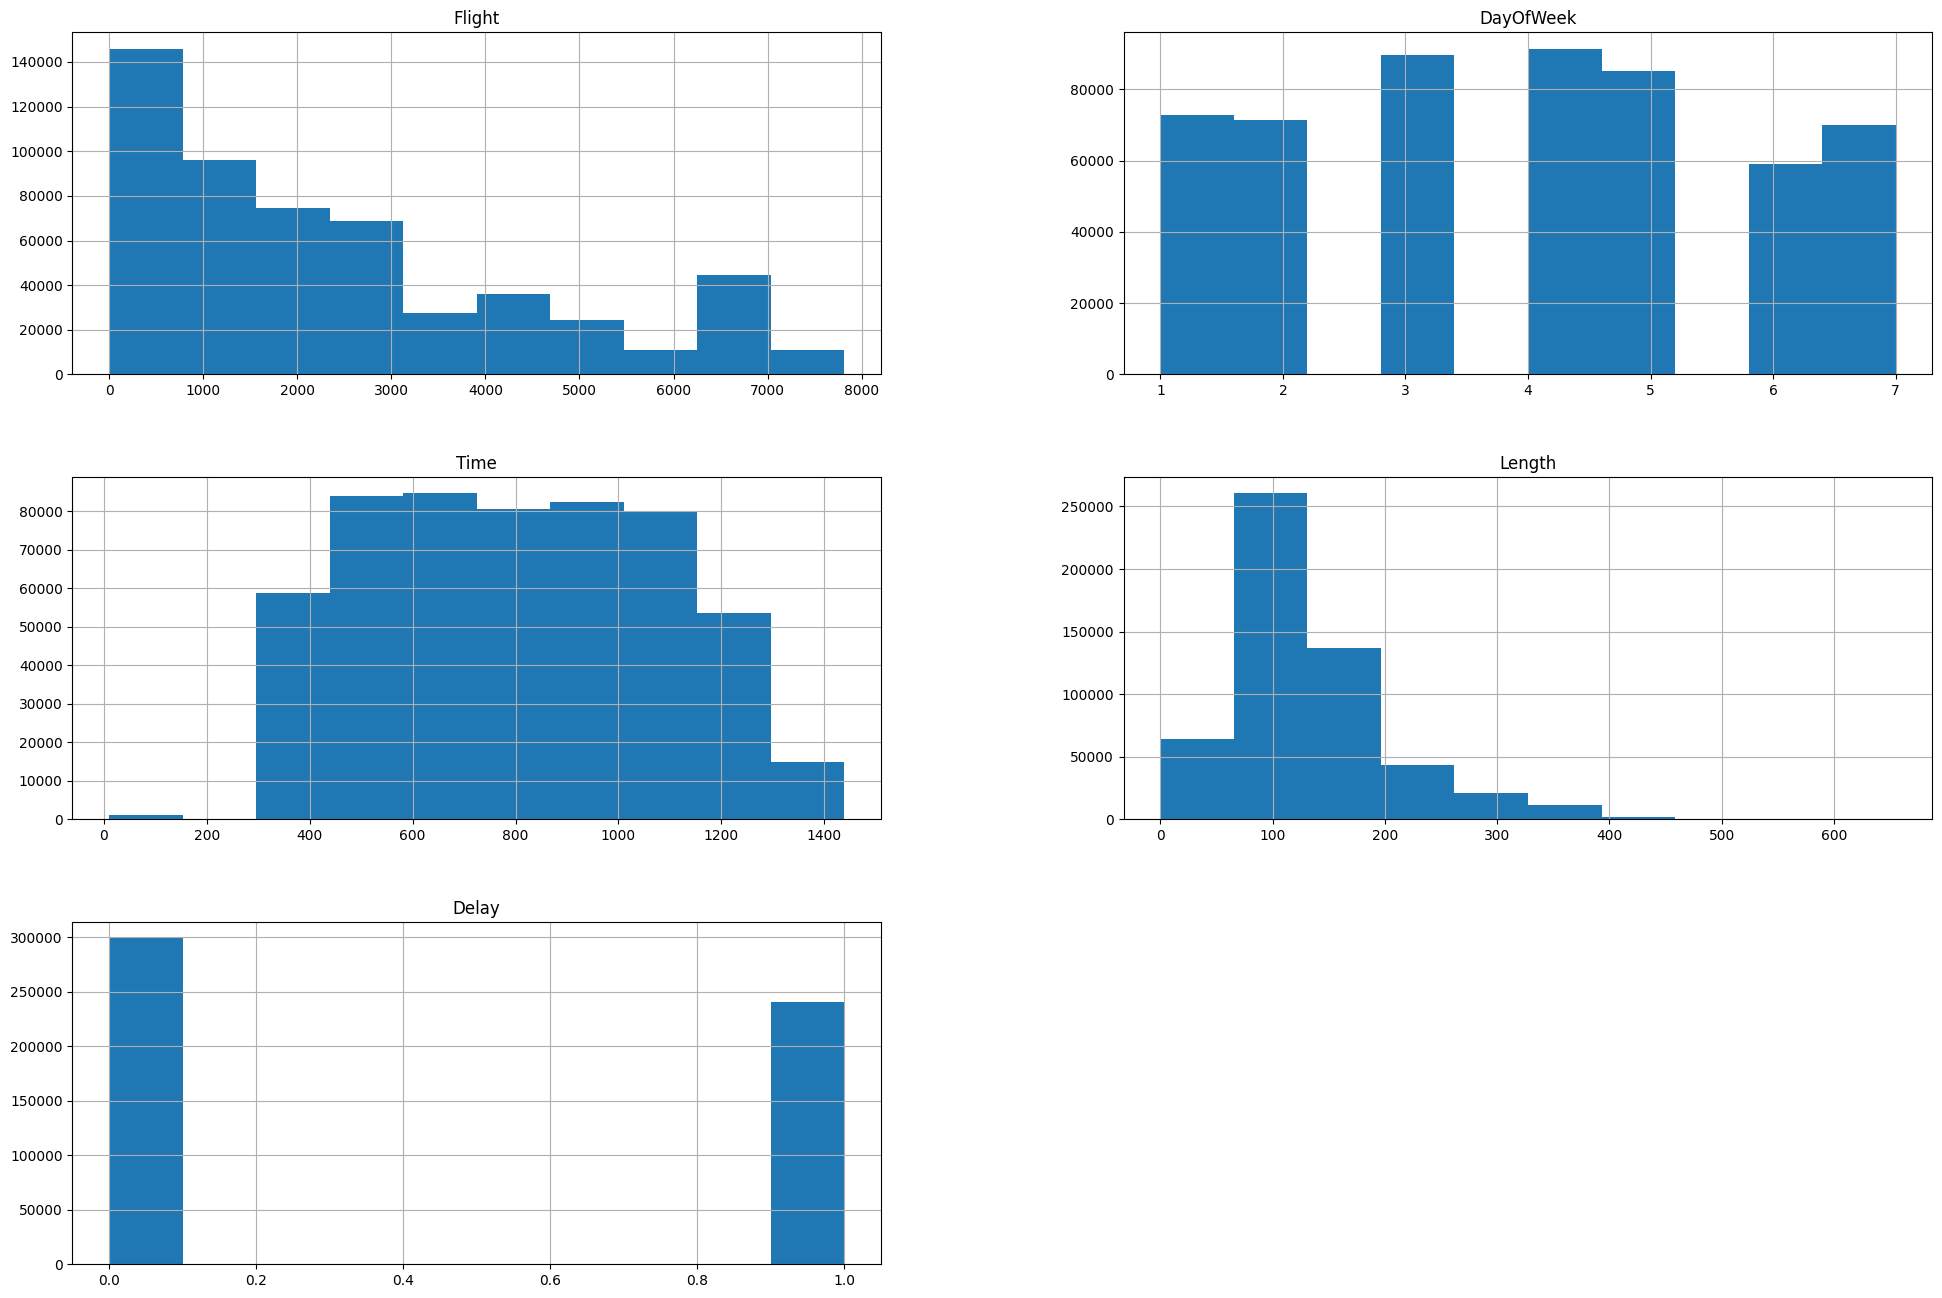

In [10]:
flights.hist(figsize=(24, 16))
plt.show()

In [11]:
corr_matrix=flights[['Flight','DayOfWeek','Time','Length','Delay']].corr()
corr_matrix

,Flight,DayOfWeek,Time,Length,Delay
Flight,1.000000,0.000416,-0.005750,-0.341481,-0.046175
DayOfWeek,0.000416,1.000000,0.001273,0.013397,-0.026199
Time,-0.005750,0.001273,1.000000,-0.020612,0.150454
Length,-0.341481,0.013397,-0.020612,1.000000,0.040489
Delay,-0.046175,-0.026199,0.150454,0.040489,1.000000


In [12]:
corr_matrix["Delay"].sort_values(ascending=False)

Delay        1.000000
Time         0.150454
Length       0.040489
DayOfWeek   -0.026199
Flight      -0.046175
Name: Delay, dtype: float64

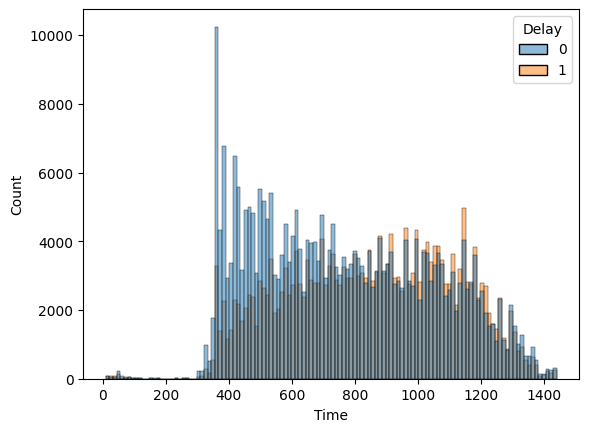

In [13]:
TimevsDelay = sns.histplot(x='Time', hue='Delay', data=flights)

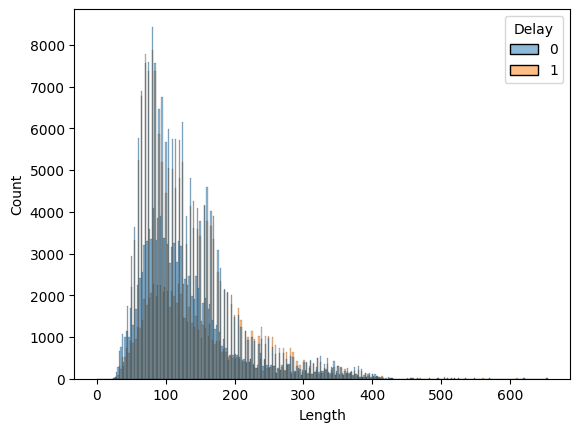

In [14]:
LengthvsDelay = sns.histplot(x='Length', hue='Delay', data=flights)

<Axes: xlabel='Airline', ylabel='count'>

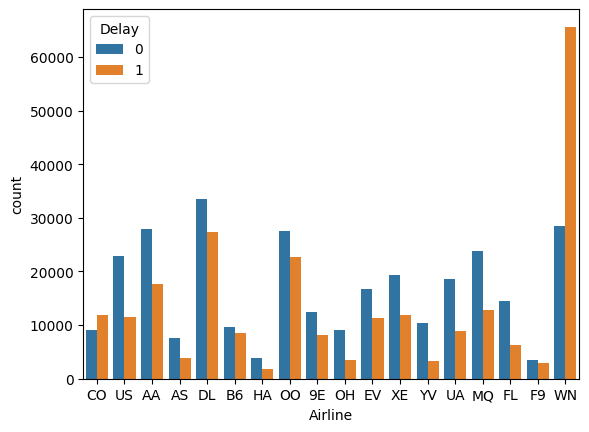

In [15]:
sns.countplot(x='Airline', hue='Delay', data=flights)

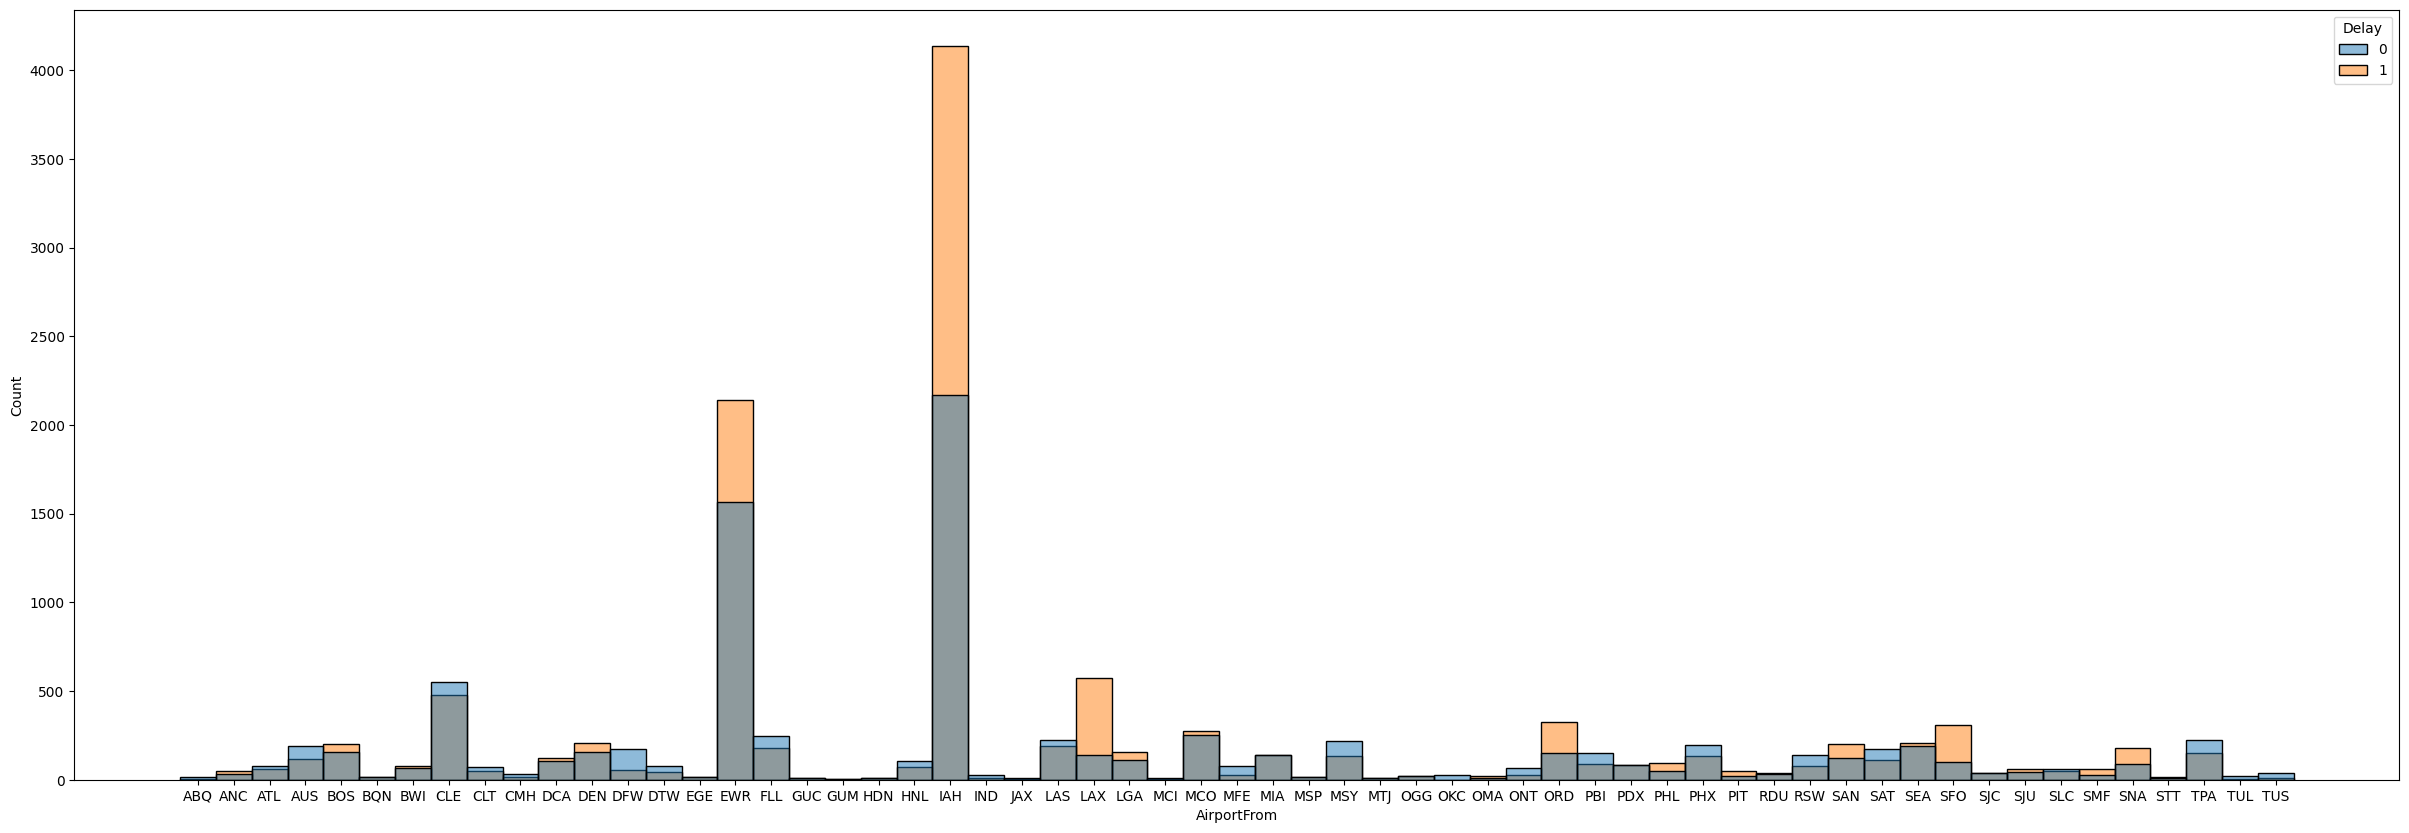

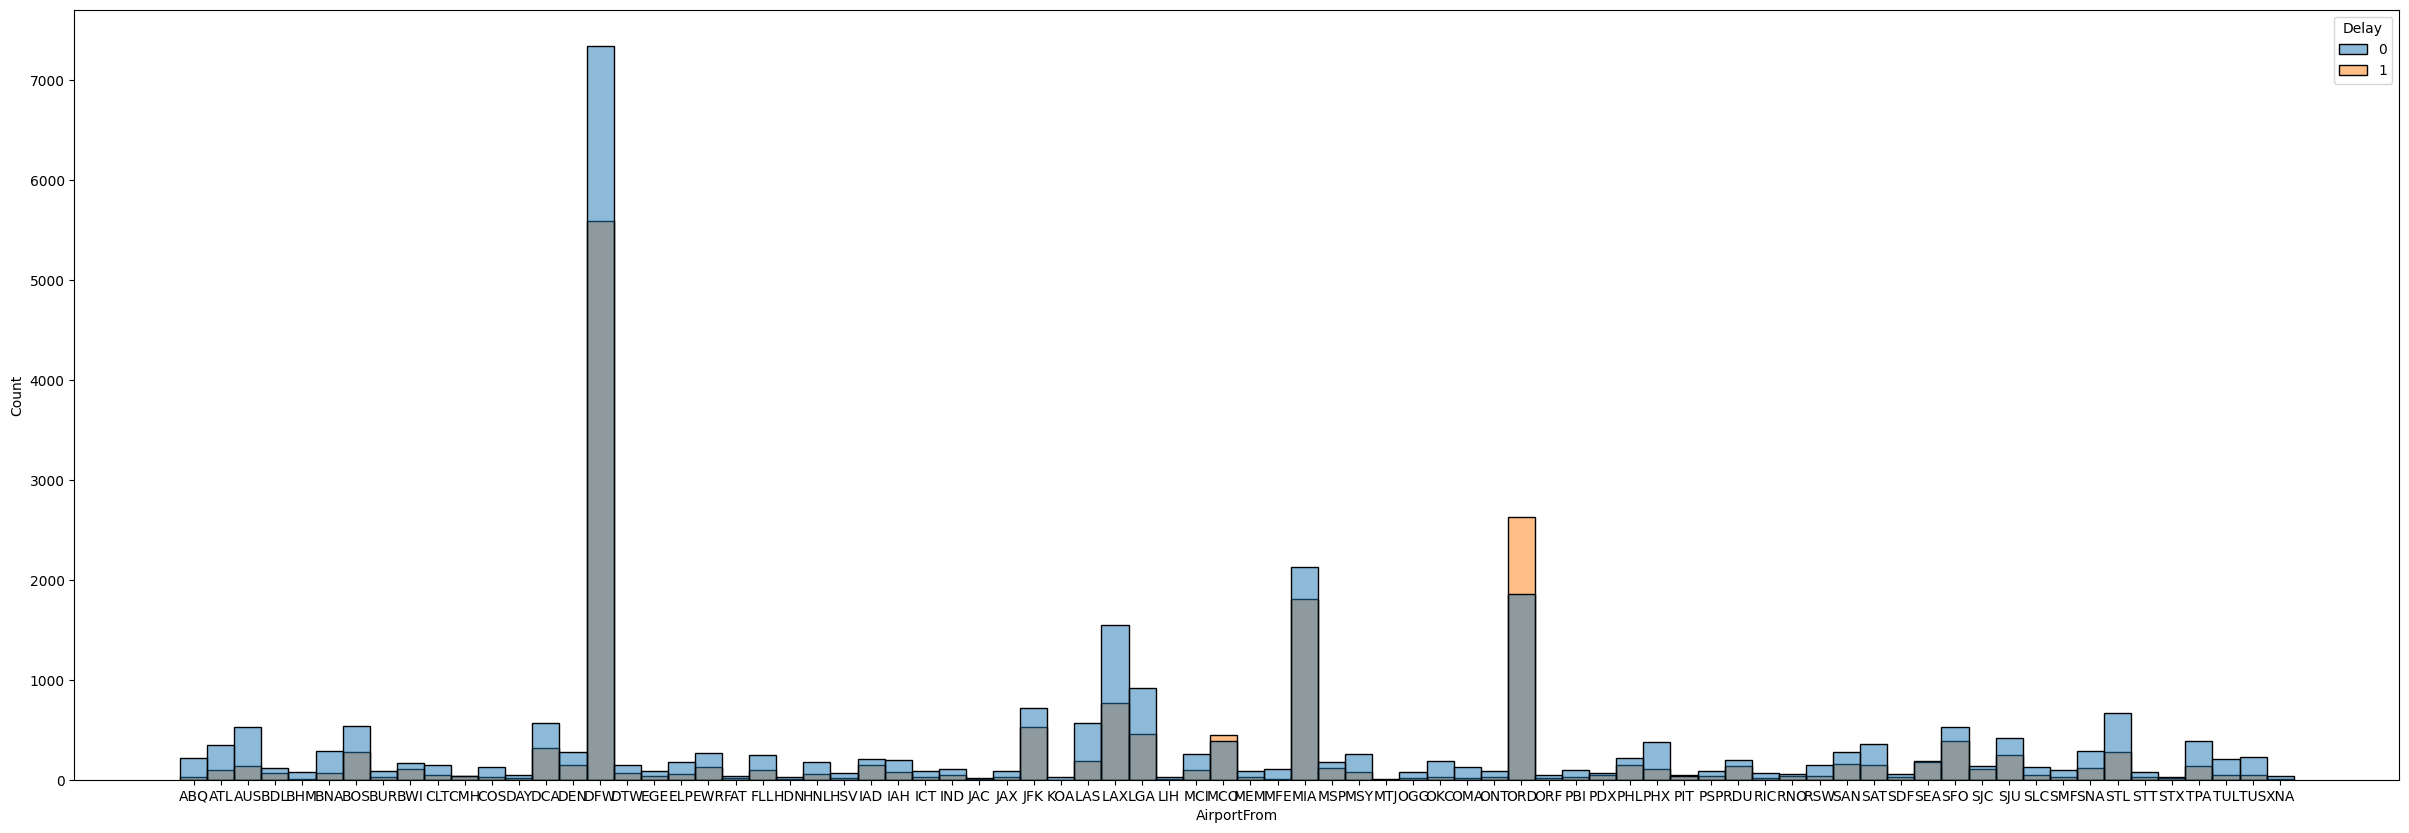

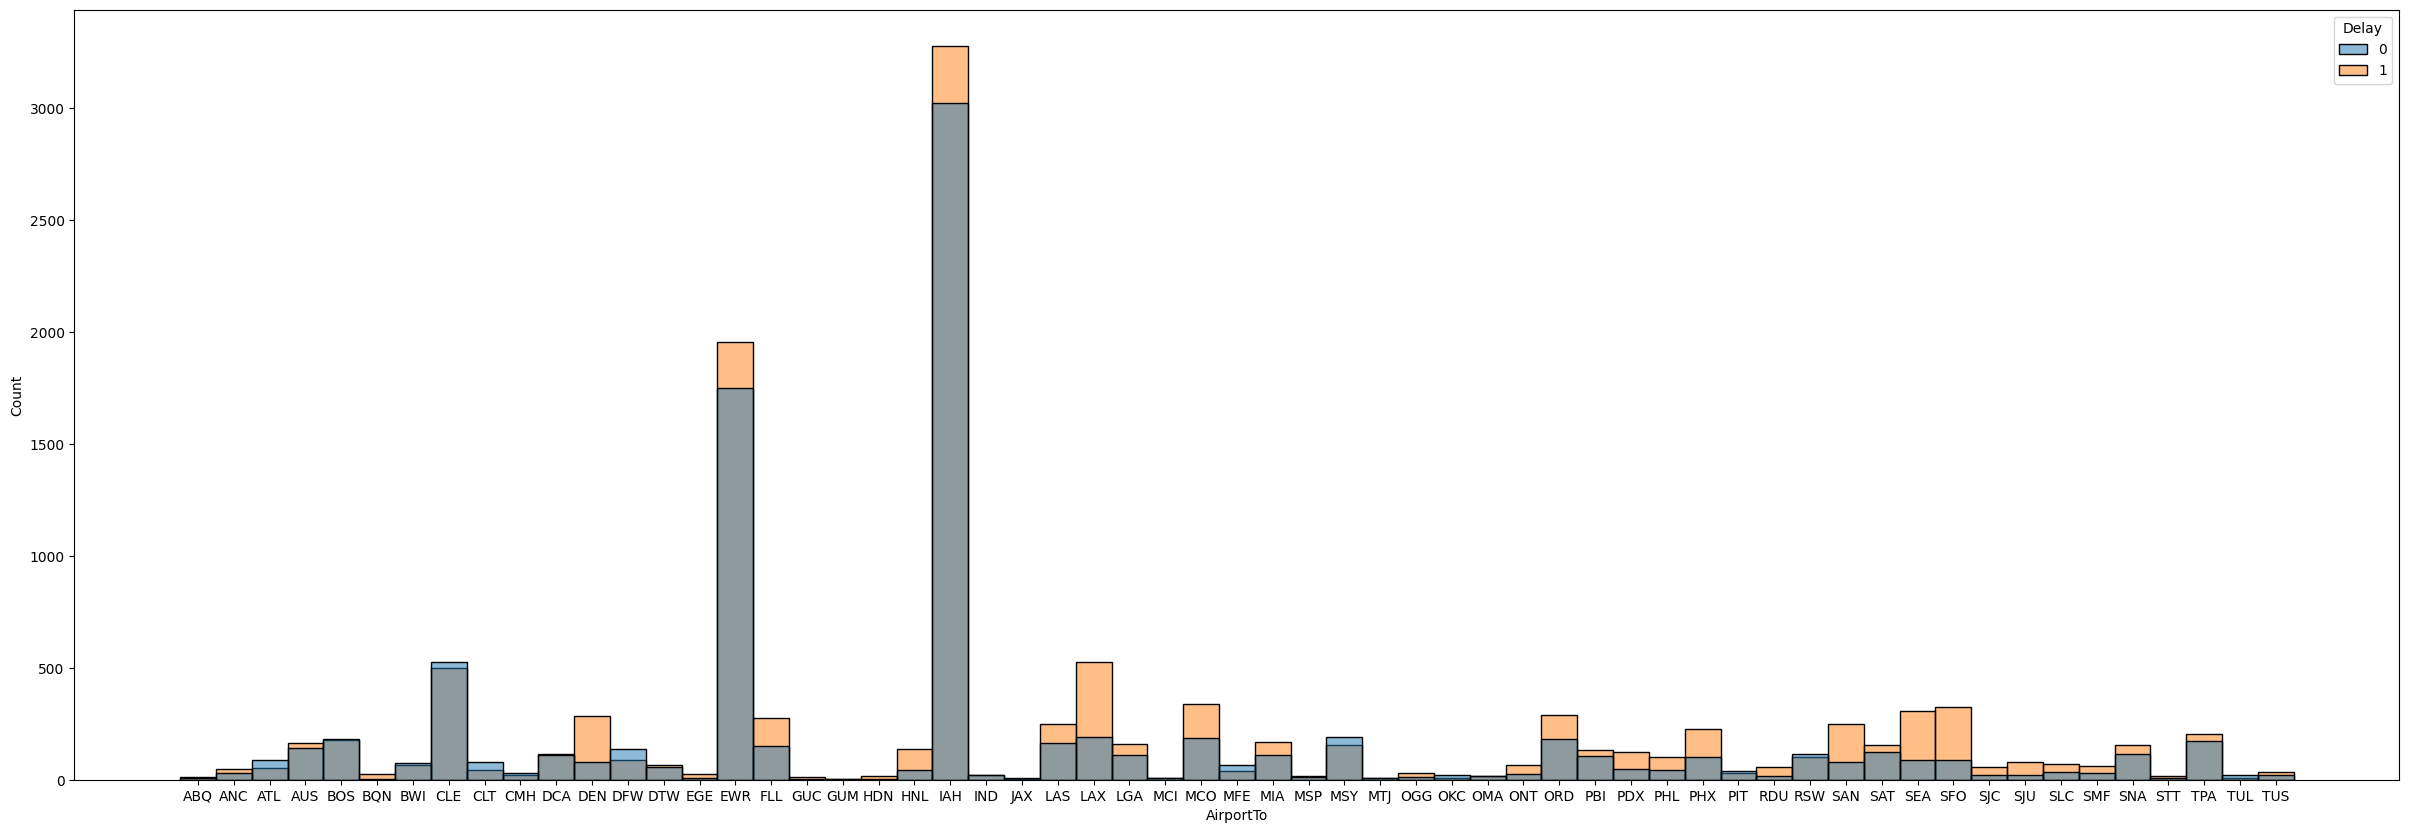

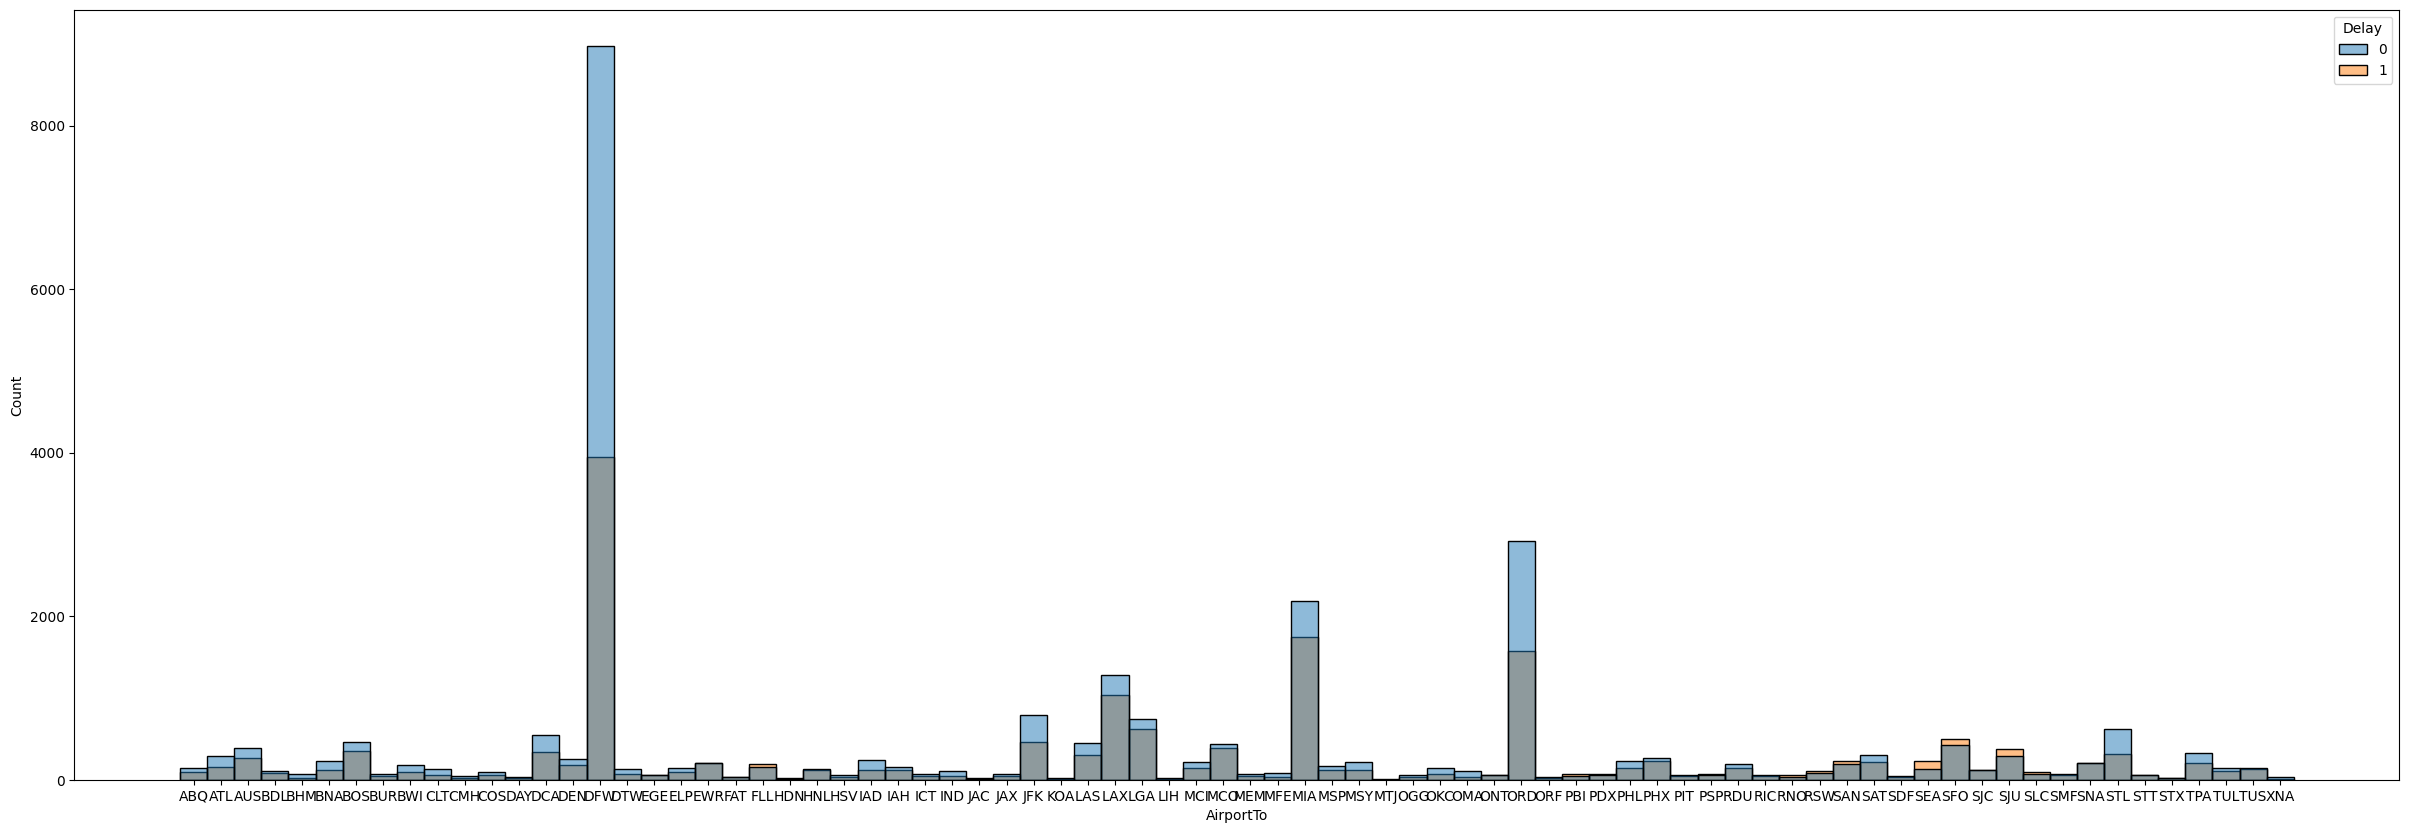

In [16]:
flights_CO = pd.DataFrame(flights[flights['Airline']=='CO'])
plt.figure(figsize=(30,10))
sns.histplot(x='AirportFrom',data=flights_CO.sort_values('AirportFrom'), hue='Delay')
plt.show()

flights_AA = pd.DataFrame(flights[flights['Airline']=='AA'])
plt.figure(figsize=(30,10))
sns.histplot(x='AirportFrom',data=flights_AA.sort_values('AirportFrom'), hue='Delay')
plt.show()

plt.figure(figsize=(30,10))
sns.histplot(x='AirportTo',data=flights_CO.sort_values('AirportTo'), hue='Delay')
plt.show()

plt.figure(figsize=(30,10))
sns.histplot(x='AirportTo',data=flights_AA.sort_values('AirportTo'), hue='Delay')
plt.show()

4. Prepare the data
Data cleaning
Handling Text and Categorical Attributes
Feature Scaling


In [17]:
flights.duplicated().sum()

216618

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [19]:
num_cols = flights.select_dtypes(include='number').columns.to_list()
cat_cols = flights.select_dtypes(exclude='number').columns.to_list()

num_cols.remove("Delay")

num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                   remainder='passthrough')

In [20]:
num_cols

['Flight', 'DayOfWeek', 'Time', 'Length']

In [21]:
cat_cols

['Airline', 'AirportFrom', 'AirportTo']

In [22]:
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Flight', 'DayOfWeek', 'Time', 'Length']),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Airline', 'AirportFrom', 'AirportTo'])])

In [23]:

# Apply the preprocessing pipeline on the dataset

flights_prepared = preprocessing.fit_transform(flights)
flights_prepared_dense = flights_prepared.toarray()

# Scikit-learn strips the column headers, so just add them back on afterward.
feature_names=preprocessing.get_feature_names_out()
flights_prepared= pd.DataFrame(flights_prepared_dense, columns=feature_names)

flights_prepared

# Select a random index
random_index = flights_prepared.sample(n=1).index

# Drop the row with the random index
flights_prepared.drop(random_index, inplace=True)



In [24]:
flights_prepared.columns

Index(['num__Flight', 'num__DayOfWeek', 'num__Time', 'num__Length',
       'cat__Airline_9E', 'cat__Airline_AA', 'cat__Airline_AS',
       'cat__Airline_B6', 'cat__Airline_CO', 'cat__Airline_DL',
       ...
       'cat__AirportTo_TYR', 'cat__AirportTo_TYS', 'cat__AirportTo_UTM',
       'cat__AirportTo_VLD', 'cat__AirportTo_VPS', 'cat__AirportTo_WRG',
       'cat__AirportTo_XNA', 'cat__AirportTo_YAK', 'cat__AirportTo_YUM',
       'remainder__Delay'],
      dtype='object', length=609)

5. Select and Train 3 Models


In [25]:
from sklearn.model_selection import train_test_split

X = flights_prepared.drop(["remainder__Delay"], axis=1)
y = flights_prepared["remainder__Delay"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(269691, 608) (269691,) (269691, 608) (269691,)


In [26]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score

              precision    recall  f1-score   support

         0.0       0.62      0.79      0.70      5547
         1.0       0.61      0.41      0.49      4453

    accuracy                           0.62     10000
   macro avg       0.62      0.60      0.59     10000
weighted avg       0.62      0.62      0.60     10000

Cross-Validation Mean Accuracy: 0.62
ROC AUC Score: 0.4996814515346954


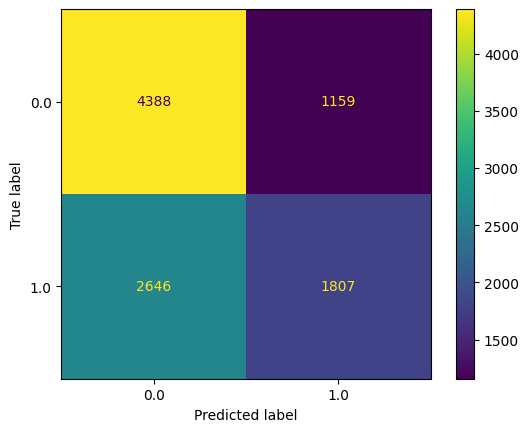

In [27]:
svm = SVC(kernel='rbf', gamma=1)
svm.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())
s_prediction = svm.predict(X_test.iloc[:10000])
s_scores = cross_val_score(svm, X_train.iloc[:10000], y_train.iloc[:10000].values.ravel(), cv=5, scoring="accuracy")
print(classification_report(y_test.iloc[:10000], s_prediction))
print(ConfusionMatrixDisplay.from_predictions(y_test.iloc[:10000], s_prediction))
print(f'Cross-Validation Mean Accuracy: {s_scores.mean()}')
print(f'ROC AUC Score: {roc_auc_score(y_train.iloc[:10000].values.ravel(), s_prediction)}')

              precision    recall  f1-score   support

         0.0       0.67      0.22      0.33    149631
         1.0       0.47      0.87      0.61    120060

    accuracy                           0.51    269691
   macro avg       0.57      0.54      0.47    269691
weighted avg       0.58      0.51      0.45    269691

Cross-Validation Mean Accuracy: 0.5038136333778238
ROC AUC Score: 0.4993929018015262


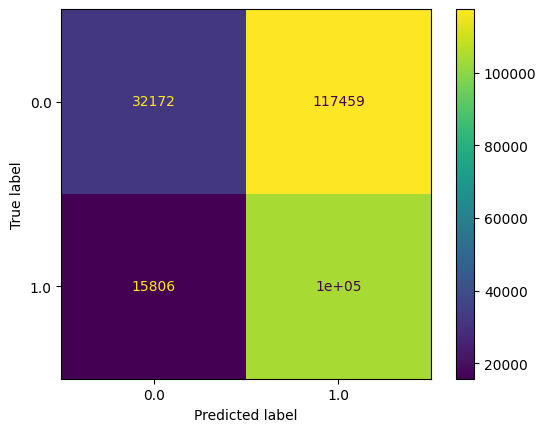

In [28]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
g_prediction = gaussian.predict(X_test)
g_scores = cross_val_score(gaussian, X_train, y_train, cv=5, scoring="accuracy")
print(classification_report(y_test, g_prediction))
print(ConfusionMatrixDisplay.from_predictions(y_test, g_prediction))
print(f'Cross-Validation Mean Accuracy: {g_scores.mean()}')
print(f'ROC AUC Score: {roc_auc_score(y_train, g_prediction)}')

              precision    recall  f1-score   support

         0.0       0.63      0.70      0.66    149631
         1.0       0.57      0.49      0.53    120060

    accuracy                           0.61    269691
   macro avg       0.60      0.60      0.60    269691
weighted avg       0.60      0.61      0.60    269691

Cross-Validation Mean Accuracy: 0.6022373783969641
ROC AUC Score: 0.4993161342456668


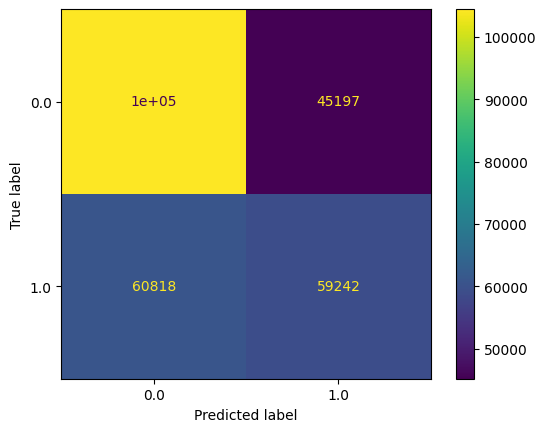

In [29]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
t_prediction=tree.predict(X_test)
t_scores = cross_val_score(tree, X_train, y_train, cv=5, scoring="accuracy")
print(classification_report(y_test, t_prediction))
print(ConfusionMatrixDisplay.from_predictions(y_test, t_prediction))
print(f'Cross-Validation Mean Accuracy: {t_scores.mean()}')
print(f'ROC AUC Score: {roc_auc_score(y_train, t_prediction)}')

6. Fine-Tune the model


              precision    recall  f1-score   support

         0.0       0.65      0.67      0.66    149631
         1.0       0.58      0.56      0.57    120060

    accuracy                           0.62    269691
   macro avg       0.61      0.61      0.61    269691
weighted avg       0.62      0.62      0.62    269691

Cross-Validation Mean Accuracy: 0.6024413166639995
ROC AUC Score: 0.49933431008780416


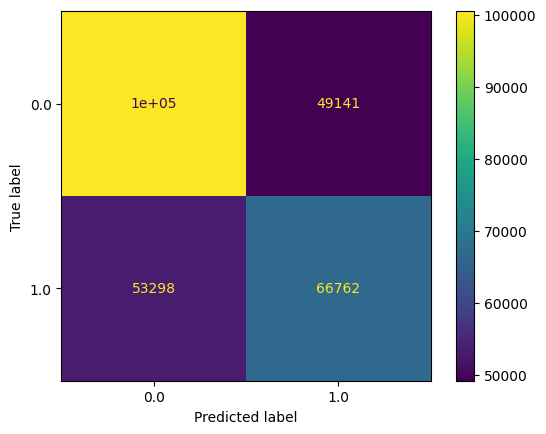

In [30]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
f_prediction=forest.predict(X_test)
f_scores = cross_val_score(tree, X_train, y_train, cv=5, scoring="accuracy")
print(classification_report(y_test, f_prediction))
print(ConfusionMatrixDisplay.from_predictions(y_test, f_prediction))
print(f'Cross-Validation Mean Accuracy: {f_scores.mean()}')
print(f'ROC AUC Score: {roc_auc_score(y_train, f_prediction)}')

In [31]:
X = flights_prepared.drop(['remainder__Delay','num__Flight', 'num__DayOfWeek', 'num__Time'], axis=1)

In [32]:
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)


param = {'criterion':['gini','entropy'],'min_samples_split':[2,5,10], 'max_depth':[None,2,8,12,20],'min_samples_leaf':[1,10]}
tree_gsv = GridSearchCV(estimator = tree, param_grid = param, cv=5)
tree_gsv.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())
tree_winner = tree_gsv.best_estimator_
tree_winner.score(X_validation, y_validation)

0.6282769105269013

In [33]:
tree_winner

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=10)

In [44]:
param = {
    'max_depth': [20,100],
    'min_samples_split': [2,5],
    'min_samples_leaf': [10,30,50],
}
forest_gsv = GridSearchCV(estimator = forest, param_grid = param, cv=5)
forest_gsv.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())
forest_winner = forest_gsv.best_estimator_
forest_winner.score(X_validation, y_validation)

0.6327357336200823

In [43]:
forest_winner

RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=5)